#Boston Housing
We were introduced to new type of dataset - Boston Housing. It is a dataset which gives us a parameters describing houses in Boston and our goal is to predict the price fo this property.

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import boston_housing 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.layers import BatchNormalization 
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
import os

(X_train, y_train), (X_valid, y_valid) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [2]:
model = Sequential()

model.add(Dense(64, input_dim=13, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(96, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 96)                12384     
                                                                 
 batch_normalization_2 (Batc  (None, 96)               3

In [3]:
model.compile(loss='mean_squared_error', optimizer='adam', )

output_dir = 'model_output/'
arch = 'regression_test'
output_path = output_dir + arch
if not os.path.exists(output_path):
    os.makedirs(output_path)
modelcheckpoint = ModelCheckpoint(output_path + '/weights.{epoch:02d}.hdf5', # decimal integers
                              save_weights_only=True) 

In [4]:
tb = TensorBoard(log_dir='logs/' + arch)

In [5]:
model.fit(X_train, y_train, 
          batch_size=8, epochs=32, verbose=1, 
          validation_data=(X_valid, y_valid),
          callbacks=[modelcheckpoint, tb]) 

Epoch 1/32
51/51 [==============================] - 3s 10ms/step - loss: 555.6082 - val_loss: 620.5037
Epoch 2/32
51/51 [==============================] - 0s 4ms/step - loss: 525.2997 - val_loss: 624.9738
Epoch 3/32
51/51 [==============================] - 0s 5ms/step - loss: 485.5505 - val_loss: 542.5204
Epoch 4/32
51/51 [==============================] - 0s 4ms/step - loss: 436.6870 - val_loss: 490.0660
Epoch 5/32
51/51 [==============================] - 0s 4ms/step - loss: 384.1162 - val_loss: 392.6064
Epoch 6/32
51/51 [==============================] - 0s 4ms/step - loss: 313.9370 - val_loss: 332.9133
Epoch 7/32
51/51 [==============================] - 0s 4ms/step - loss: 255.2447 - val_loss: 176.6940
Epoch 8/32
51/51 [==============================] - 0s 4ms/step - loss: 184.7783 - val_loss: 216.6167
Epoch 9/32
51/51 [==============================] - 0s 5ms/step - loss: 133.2939 - val_loss: 90.0902
Epoch 10/32
51/51 [==============================] - 0s 5ms/step - loss: 89.2738 -

of course, we can do the same thing that we did to the first model - compare the performance using tenser board. At our classes our task was to create the regression line with the 45 degrees angle. 

In [6]:
model.load_weights(output_path + '/weights.05.hdf5')

model.predict(np.reshape(X_valid[42], [1, 13]))

y_predicted = model.predict(X_valid)

4/4 [==============================] - 0s 4ms/step


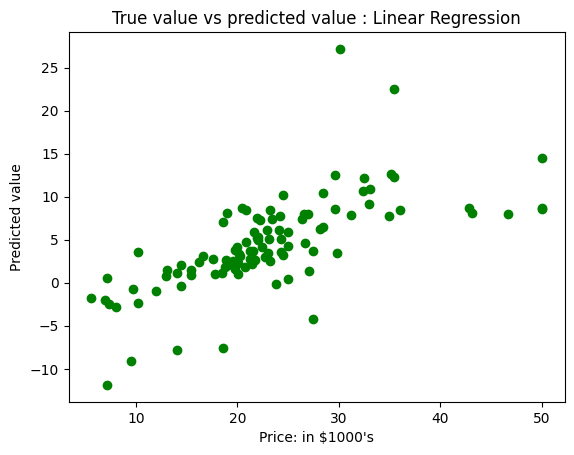

In [7]:
plt.scatter(y_valid, y_predicted, c = 'green')
plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()

Using the plots we can see the ratio of predicted price to actual one. This is another tool we can use to improve our modeling. During this classes we kind of learned how to work on different datasets. This task gives us more information of what kind of data models require to work on and what the results may be.